In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn.externals import joblib

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
pd.set_option('display.max_columns', 30)
df = pd.read_csv('horse.csv')
imputer = Imputer()

In [3]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [4]:
df.drop(['cp_data','lesion_1','lesion_2','lesion_3','nasogastric_reflux_ph','hospital_number','abdomo_protein','abdomo_appearance'],inplace=True,axis=1)

In [5]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,45.0,8.4,died,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,50.0,85.0,euthanized,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,33.0,6.7,lived,no
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,48.0,7.2,died,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,died,no


In [6]:
df['total_protein'] = imputer.fit_transform(df[['total_protein']])

In [7]:
df['packed_cell_volume'] = imputer.fit_transform(df[['packed_cell_volume']])

In [8]:
df['pulse'] = imputer.fit_transform(df[['pulse']])

In [9]:
df['respiratory_rate'] = imputer.fit_transform(df[['respiratory_rate']])

In [10]:
df['rectal_temp'] = imputer.fit_transform(df[['rectal_temp']])

In [11]:
def impute_cat(cols):
    temp = cols[0]
   
    
    if pd.isnull(temp):
        return "<UNK>"

    else:
        return temp

In [12]:
df['abdomen'] = df[['abdomen']].apply(impute_cat,axis=1)

In [13]:
df['surgical_lesion'] = df[['surgical_lesion']].apply(impute_cat,axis=1)

In [14]:
df['rectal_exam_feces'] = df[['rectal_exam_feces']].apply(impute_cat,axis=1)

In [15]:
df['nasogastric_reflux'] = df[['nasogastric_reflux']].apply(impute_cat,axis=1)

In [16]:
df['nasogastric_tube'] = df[['nasogastric_tube']].apply(impute_cat,axis=1)

In [17]:
df['abdominal_distention'] = df[['abdominal_distention']].apply(impute_cat,axis=1)

In [18]:
df['peristalsis'] = df[['peristalsis']].apply(impute_cat,axis=1)

In [19]:
df['pain'] = df[['pain']].apply(impute_cat,axis=1)

In [20]:
df['capillary_refill_time'] = df[['capillary_refill_time']].apply(impute_cat,axis=1)

In [21]:
df['mucous_membrane'] = df[['mucous_membrane']].apply(impute_cat,axis=1)

In [22]:
df['peripheral_pulse'] = df[['peripheral_pulse']].apply(impute_cat,axis=1)

In [23]:
df['temp_of_extremities'] = df[['temp_of_extremities']].apply(impute_cat,axis=1)

In [24]:
df['age'] = df[['age']].apply(impute_cat,axis=1)

In [25]:
df['surgery'] = df[['surgery']].apply(impute_cat,axis=1)

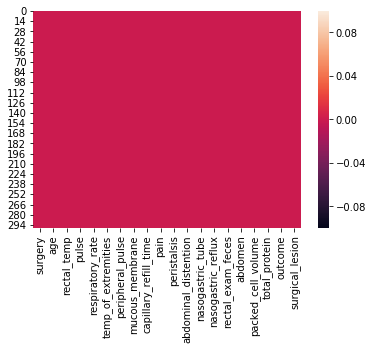

In [26]:
sns.heatmap(df.isnull())

In [27]:
cat_df = df.select_dtypes(include=['object'])

In [28]:
df.drop(['temp_of_extremities','peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain','peristalsis', 'abdominal_distention', 'nasogastric_tube',
       'nasogastric_reflux', 'rectal_exam_feces', 'abdomen','outcome','surgery','surgical_lesion','age'],axis=1,inplace=True)

In [29]:
cat_df.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome,surgical_lesion
0,no,adult,cool,reduced,<UNK>,more_3_sec,extreme_pain,absent,severe,<UNK>,<UNK>,decreased,distend_large,died,no
1,yes,adult,<UNK>,<UNK>,pale_cyanotic,less_3_sec,mild_pain,absent,slight,<UNK>,<UNK>,absent,other,euthanized,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,<UNK>,<UNK>,normal,normal,lived,no
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,<UNK>,died,yes
4,no,adult,<UNK>,<UNK>,dark_cyanotic,more_3_sec,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,died,no


In [30]:
min_max_scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(min_max_scaler.fit_transform(df))
df.head()

,0,1,2,3,4
0,0.574074,0.233766,0.227273,0.423077,0.059510
1,0.703704,0.376623,0.136364,0.519231,0.953326
2,0.537037,0.064935,0.181818,0.192308,0.039673
3,0.685185,0.870130,0.863636,0.480769,0.045508
4,0.351852,0.480519,0.306818,0.980769,0.047841


In [31]:
cat_df = pd.get_dummies(cat_df,columns=['temp_of_extremities','peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain','peristalsis', 'abdominal_distention', 'nasogastric_tube',
       'nasogastric_reflux', 'rectal_exam_feces', 'abdomen','surgery','surgical_lesion','age'])

In [32]:
cat_df.head()

,outcome,temp_of_extremities_<UNK>,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_<UNK>,peripheral_pulse_absent,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_<UNK>,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,...,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_<UNK>,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,surgery_no,surgery_yes,surgical_lesion_no,surgical_lesion_yes,age_adult,age_young
0,died,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
1,euthanized,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,lived,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
3,died,0,1,0,0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1
4,died,1,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0


In [33]:
le = LabelEncoder()
le.fit(["died","euthanized","lived"])
cat_df['outcome'] = le.transform(cat_df['outcome'])

In [34]:
cat_df.head()

,outcome,temp_of_extremities_<UNK>,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_<UNK>,peripheral_pulse_absent,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_<UNK>,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,...,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_<UNK>,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,surgery_no,surgery_yes,surgical_lesion_no,surgical_lesion_yes,age_adult,age_young
0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0


In [35]:
findata = pd.DataFrame(data=pd.concat([cat_df,df],axis=1))

In [36]:
x = findata.drop('outcome',axis=1).values
y = findata['outcome'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [38]:
algo = {'RFC':RandomForestClassifier(n_estimators=100)}

In [39]:
for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    print('Confusion Matrix : \n'+format(confusion_matrix(y_test, model.predict(X_test),labels = [0,1,2])))
    print('Acurracy of ' + k + ' is {0:.2f}'.format(model.score(X_test, y_test)*100))
    print(classification_report(y_test, model.predict(X_test)))
    print('\n')
    # save the model to disk
    filename = 'finalized_model.sav'
    joblib.dump(model, filename)
    

Confusion Matrix : 
[[ 6  0  3]
 [ 3  0  5]
 [ 3  0 40]]
Acurracy of RFC is 76.67
             precision    recall  f1-score   support

          0       0.50      0.67      0.57         9
          1       0.00      0.00      0.00         8
          2       0.83      0.93      0.88        43

avg / total       0.67      0.77      0.72        60





/usr/lib/python3/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
